In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary= pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary.duplicated().sum()

0

In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


outliers detection

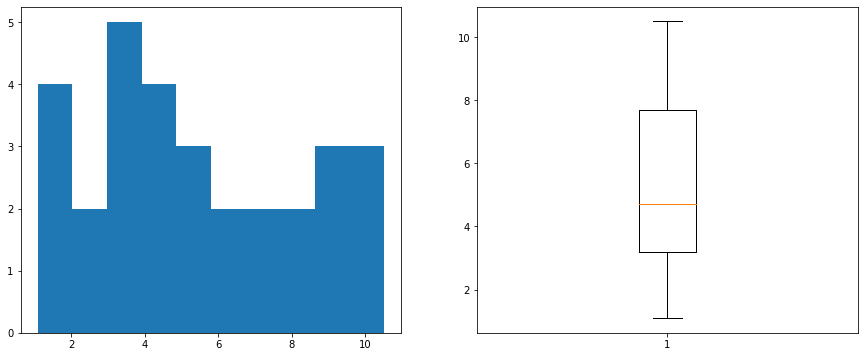

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(salary["YearsExperience"])
 
plt.subplot(1,2,2)
plt.boxplot(salary["YearsExperience"])
plt.show()

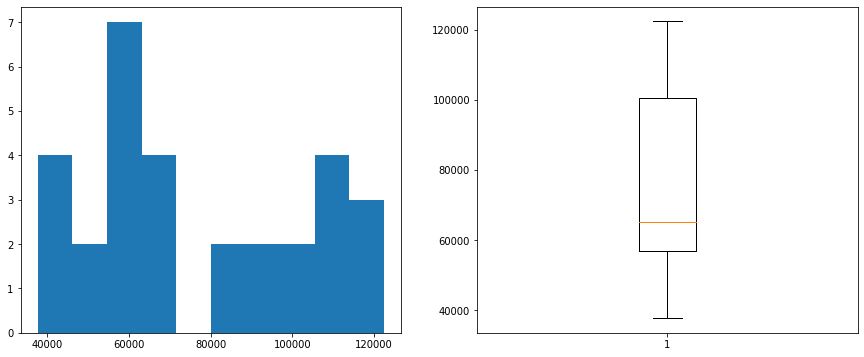

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(salary["Salary"])
 
plt.subplot(1,2,2)
plt.boxplot(salary["Salary"])
plt.show()


In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


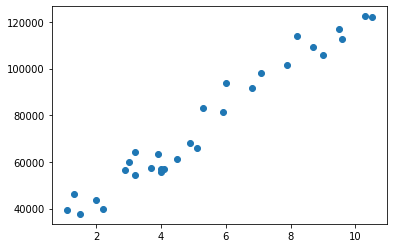

In [ ]:
plt.scatter(salary["YearsExperience"], salary["Salary"]) 


Model Building

In [ ]:
model = smf.ols("Salary~YearsExperience",data =salary).fit()

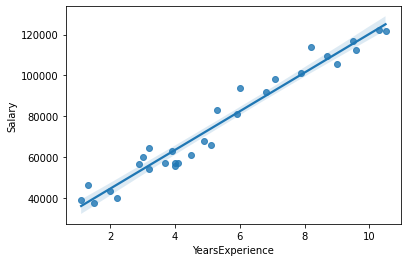

In [ ]:
sns.regplot(x="YearsExperience", y="Salary", data=salary)


In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


H0 = Two variables are indep. ie B1 = 0

H1 = Two variables are dependent. ie B1 != 0

p value (1.143068e-20) < alpha so H1 accepted ie two variables are dependent, B1!=0

In [ ]:
model.params 
#Y(salary)=B0(25792) + 9449(B1)*X(Years of exp.)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Lets perform some transformations on data to see whether we get improved r square value

Transforming Years of Experience


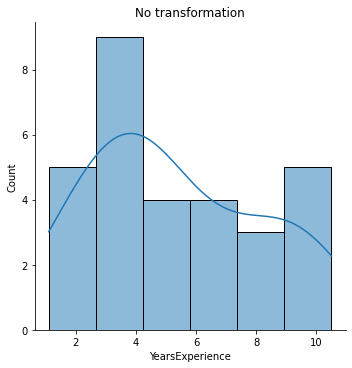

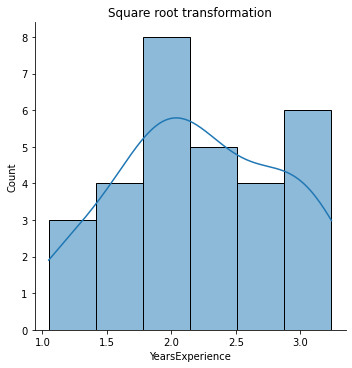

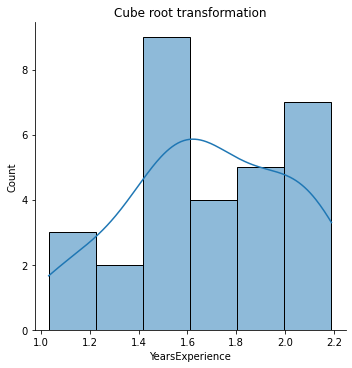

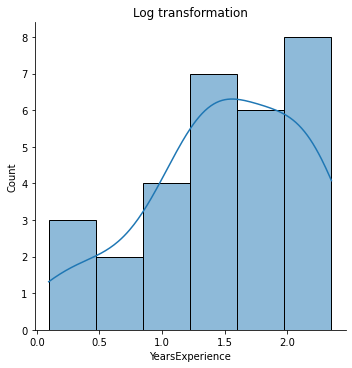

In [ ]:
sns.displot(salary["YearsExperience"], kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(salary["YearsExperience"]), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(salary["YearsExperience"]), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(salary["YearsExperience"]), kde=True)
plt.title('Log transformation')


plt.show() 

Text(0.5, 1.0, 'Log transformation')

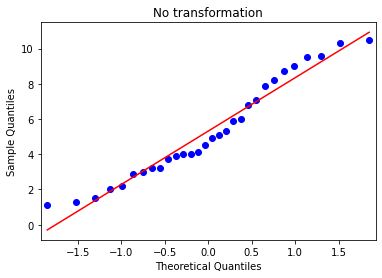

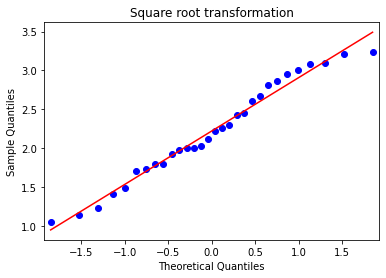

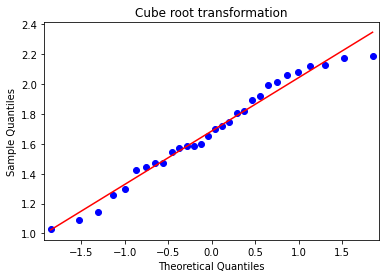

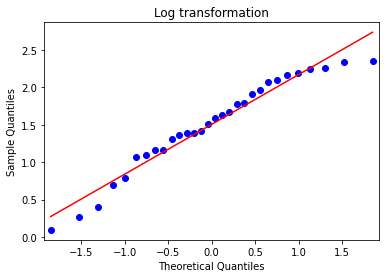

In [ ]:
sm.qqplot(salary["YearsExperience"], line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(salary["YearsExperience"]), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(salary["YearsExperience"]), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(salary["YearsExperience"]), line = 'r')
plt.title('Log transformation')

Transforming salary

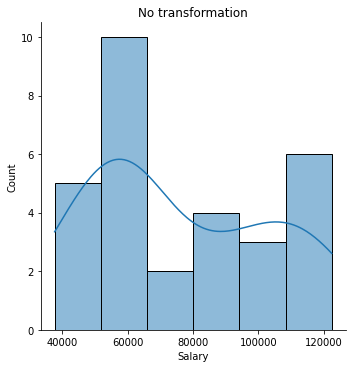

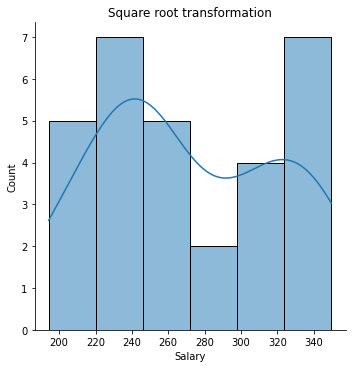

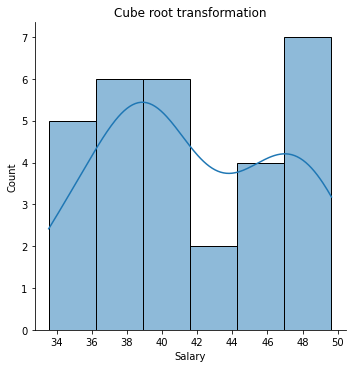

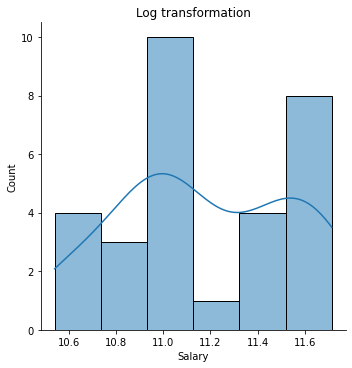

In [ ]:
sns.displot(salary["Salary"], kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(salary["Salary"]), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(salary["Salary"]), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(salary["Salary"]), kde=True)
plt.title('Log transformation')


plt.show() 

Text(0.5, 1.0, 'Log transformation')

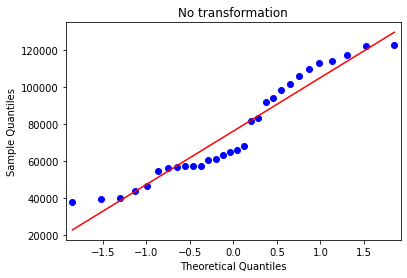

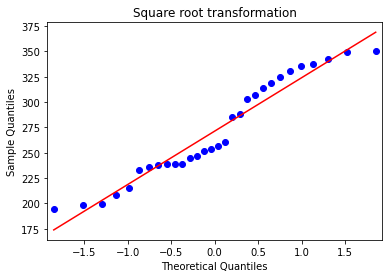

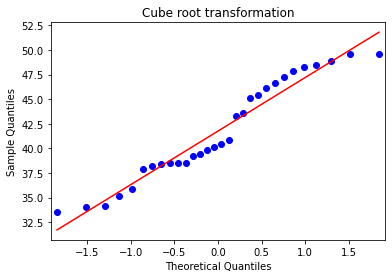

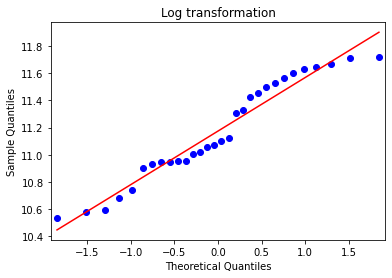

In [ ]:
sm.qqplot(salary["Salary"], line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(salary["Salary"]), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(salary["Salary"]), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(salary["Salary"]), line = 'r')
plt.title('Log transformation')

In [ ]:
model_sqrt = smf.ols("np.sqrt(Salary)~np.sqrt(YearsExperience)",data =salary).fit()

In [ ]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj)

(0.9419490138976826, 0.9398757643940284)

In [ ]:
model_cbrt = smf.ols("np.cbrt(Salary)~np.cbrt(YearsExperience)",data =salary).fit()


In [ ]:
(model_cbrt.rsquared, model_cbrt.rsquared_adj) 


(0.9324434036761003, 0.9300306680931039)

In [ ]:
model_log = smf.ols("np.log(Salary)~np.log(YearsExperience)",data =salary).fit()


In [ ]:
(model_log.rsquared, model_log.rsquared_adj) 


(0.905215072581715, 0.9018298966024905)

Among all the transformations, Sqrt transformation has highest R square adj value, but not higher than model with No transformation

Model with no transformation has highest r square adj value.

Residual Analysis


Test for Normality of Residuals (Q-Q Plot)

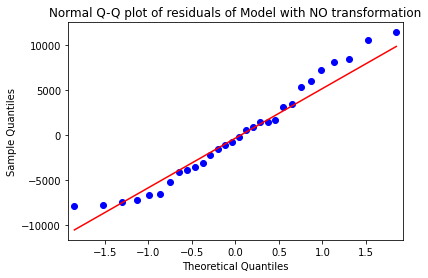

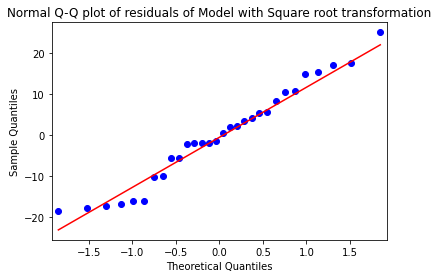

In [ ]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with NO transformation')
plt.show()

sm.qqplot(model_sqrt.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Square root transformation')
plt.show() 

Model with NO transformation follows near normal distributon with less skewness than model with sqrt transformation



Residual Plot to check Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

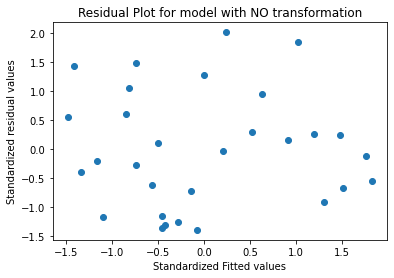

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot for model with NO transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

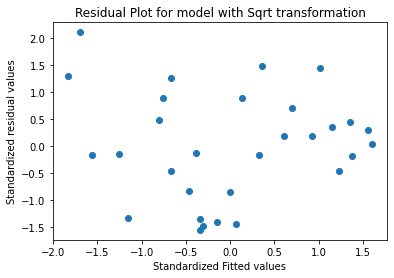

In [ ]:
plt.scatter(get_standardized_values(model_sqrt.fittedvalues),
            get_standardized_values(model_sqrt.resid))

plt.title('Residual Plot for model with Sqrt transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Homoscedasticity refers to a condition in which the variance of the residual or error term, in a regression model is constant

Some errors are positive, some are negative. Hence mean of errors should be zero

In [ ]:
errors=model.resid 
errors.mean()

9.701276818911234e-13

Model Validation

In [ ]:
model_rmse=np.sqrt(model.mse_resid)

In [ ]:
model_sqrt_pred_y =np.square(model_sqrt.predict(salary.YearsExperience))
model_sqrt_rmse =np.sqrt(mean_squared_error(salary.Salary, model_sqrt_pred_y))


In [ ]:
model_cbrt_pred_y =pow(model_cbrt.predict(salary.YearsExperience),3)
model_cbrt_rmse =np.sqrt(mean_squared_error(salary.Salary, model_cbrt_pred_y))


In [ ]:
model_log_pred_y =np.exp(model_log.predict(salary.YearsExperience))
model_log_rmse =np.sqrt(mean_squared_error(salary.Salary, model_log_pred_y))

In [ ]:
print('model=', model_rmse,'\n' 'model_sqrt=', model_sqrt_rmse,'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)



model= 5788.315051119395 
model_sqrt= 5960.647096174309 
model_cbrt= 6232.815455835847 
model_log= 7219.716974372806


Model with No transformation has minimum RMSE and highest R square adjusted score. Hence model with NO transformation will be our final model


Predicting Salary

In [ ]:
train_data = pd.DataFrame()
train_data['Salary'] = salary.Salary.head(10)
train_data['YearsExperience'] = salary.YearsExperience.head(10) 
train_data 

,Salary,YearsExperience
0,39343.0,1.1
1,46205.0,1.3
2,37731.0,1.5
3,43525.0,2.0
4,39891.0,2.2
5,56642.0,2.9
6,60150.0,3.0
7,54445.0,3.2
8,64445.0,3.2
9,57189.0,3.7


In [ ]:
train_data['predicted_delivery_normal'] = model.predict(train_data)


In [ ]:
train_data['predicted_delivery_log'] = np.exp(model_log.predict(train_data))


In [ ]:
train_data

,Salary,YearsExperience,predicted_delivery_normal,predicted_delivery_log
0,39343.0,1.1,36187.158752,32261.052293
1,46205.0,1.3,38077.151217,35437.122429
2,37731.0,1.5,39967.143681,38405.293942
3,43525.0,2.0,44692.124842,45145.842502
4,39891.0,2.2,46582.117306,47630.388981
5,56642.0,2.9,53197.090931,55631.518478
6,60150.0,3.0,54142.087163,56701.779991
7,54445.0,3.2,56032.079627,58796.479782
8,64445.0,3.2,56032.079627,58796.479782
9,57189.0,3.7,60757.060788,63795.788170


Taking input from user

In [ ]:
workXp = float(input("Enter your work experience: ")) 


Enter your work experience: 6


In [ ]:
newdata=pd.DataFrame([workXp],columns=['YearsExperience']) 
newdata 

,YearsExperience
0,6.0


In [ ]:
model.predict(newdata)

0    82491.974127
dtype: float64